# Quantifying Divergence of Multiple Teachers

In [1]:
import numpy as np
from scipy.special import softmax
from scipy.spatial.distance import jensenshannon

from itertools import combinations

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
CLASSES = 10
SAMPLES = 10
NUM_TEACHERS = 4

We are going to generate dummy softmax outputs on 10 classes from 4 teachers for 10 data samples. Since we are going to generate dummy data outputs by sampling from uniform distribution, the differences in resulting visuals are not going to be that discernable. You will find more prominent results from your experiments where your teachers diverge quite a lot.

In [21]:
def generate_sample_output_distributions(samples=10, classes=10):
    outputs = np.random.rand(samples,classes) 
    softmax_outputs = softmax(outputs, axis=1)
    return softmax_outputs

In [22]:
teacher_outputs = {}

for t_i in range(NUM_TEACHERS):
    sample_outputs = generate_sample_output_distributions(samples=SAMPLES, classes=CLASSES)
    teacher_name = 'teacher_{}'.format(t_i)
    teacher_outputs[teacher_name] = sample_outputs

In [23]:
print("Teachers")
teacher_outputs.keys()

Teachers


dict_keys(['teacher_0', 'teacher_1', 'teacher_2', 'teacher_3'])

In [24]:
teacher_outputs['teacher_0'].shape

(10, 10)

For each data sample, we want to measure the divergence of 4 teachers.

#### Visualizing the output distributions

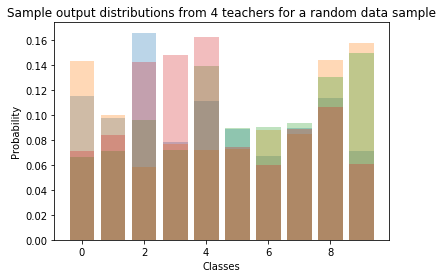

In [25]:
for t_name in teacher_outputs:
    rand_idx = np.random.randint(SAMPLES)
    plt.bar(range(CLASSES), teacher_outputs[t_name][rand_idx], alpha=0.3)
plt.xlabel("Classes")
plt.ylabel("Probability")
plt.title("Sample output distributions from 4 teachers for a random data sample")
plt.show()

#### Possible combinations of teacher pairs

In [26]:
teacher_pairs = list(combinations(teacher_outputs.keys(), r=2))
print("There are {} possbile teacher pairs".format(len(teacher_pairs)))
teacher_pairs

There are 6 possbile teacher pairs


[('teacher_0', 'teacher_1'),
 ('teacher_0', 'teacher_2'),
 ('teacher_0', 'teacher_3'),
 ('teacher_1', 'teacher_2'),
 ('teacher_1', 'teacher_3'),
 ('teacher_2', 'teacher_3')]

#### For a single data sample, these are corresponding JS divergence values for each teacher pair

In [27]:
rand_idx = np.random.randint(SAMPLES)
print("For data sample at index: {}".format(rand_idx))
js_values = []
for t1_name, t2_name in teacher_pairs:
    t1_out = teacher_outputs[t1_name][rand_idx]
    t2_out = teacher_outputs[t2_name][rand_idx]
    js_div = jensenshannon(t1_out, t2_out)
    js_values.append(js_div)
    print("{} <==> {} :: JS divergence is {}".format(t1_name, t2_name,
                                                     js_div))

For data sample at index: 1
teacher_0 <==> teacher_1 :: JS divergence is 0.1438072370565025
teacher_0 <==> teacher_2 :: JS divergence is 0.14448989884137123
teacher_0 <==> teacher_3 :: JS divergence is 0.11438029431603193
teacher_1 <==> teacher_2 :: JS divergence is 0.14025146835260785
teacher_1 <==> teacher_3 :: JS divergence is 0.12944548784379645
teacher_2 <==> teacher_3 :: JS divergence is 0.08693820944799673


**Take the mean value of all those**

In [28]:
print("For data sample idx {} :: Mean JS divergence value for 4 teachers: {}".format(rand_idx,
                                                                                     np.mean(js_values)))

For data sample idx 1 :: Mean JS divergence value for 4 teachers: 0.12655209930971778


#### Collect this mean value for all data samples

In [29]:
mean_js_values = []
for i in range(SAMPLES):
    js_values = []
    for t1_name, t2_name in teacher_pairs:
        t1_out = teacher_outputs[t1_name][i]
        t2_out = teacher_outputs[t2_name][i]
        js_div = jensenshannon(t1_out, t2_out)
        js_values.append(js_div)
        print("{} <==> {} :: JS divergence for data sample at index {} is {}".format(t1_name, t2_name,
                                                                                     i, js_div))
    mean_js = np.mean(js_values)
    print("For data sample idx {} :: Mean JS divergence value for 4 teachers: {}".format(i,
                                                                                         mean_js))
    mean_js_values.append(mean_js)

teacher_0 <==> teacher_1 :: JS divergence for data sample at index 0 is 0.10742330132951547
teacher_0 <==> teacher_2 :: JS divergence for data sample at index 0 is 0.1569871849163815
teacher_0 <==> teacher_3 :: JS divergence for data sample at index 0 is 0.12847224765435203
teacher_1 <==> teacher_2 :: JS divergence for data sample at index 0 is 0.15144721424541446
teacher_1 <==> teacher_3 :: JS divergence for data sample at index 0 is 0.15804110858483378
teacher_2 <==> teacher_3 :: JS divergence for data sample at index 0 is 0.21335079806686663
For data sample idx 0 :: Mean JS divergence value for 4 teachers: 0.15262030913289396
teacher_0 <==> teacher_1 :: JS divergence for data sample at index 1 is 0.1438072370565025
teacher_0 <==> teacher_2 :: JS divergence for data sample at index 1 is 0.14448989884137123
teacher_0 <==> teacher_3 :: JS divergence for data sample at index 1 is 0.11438029431603193
teacher_1 <==> teacher_2 :: JS divergence for data sample at index 1 is 0.14025146835260

#### Sort the mean values and get top-K indices with highest mean JS divergence values

You can easily do this with argsort

In [30]:
desc_idxs = np.argsort(mean_js_values)[::-1] # Reverse the list since argsort returns in ascending order

Let's say we want to see top 5 images with most mean JS divergence

In [31]:
top_5 = desc_idxs[:5]

Now, you can visualize the **output distributions**, or original **images** corresponding to these indices

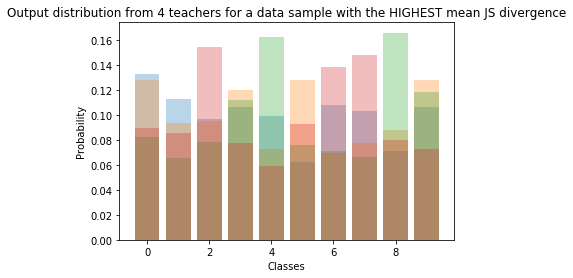

In [32]:
top_1 = top_5[0]
for t_name in teacher_outputs:
    rand_idx = np.random.randint(SAMPLES)
    plt.bar(range(CLASSES), teacher_outputs[t_name][top_1], alpha=0.3)
plt.xlabel("Classes")
plt.ylabel("Probability")
plt.title("Output distribution from 4 teachers for a data sample with the HIGHEST mean JS divergence")
plt.show()

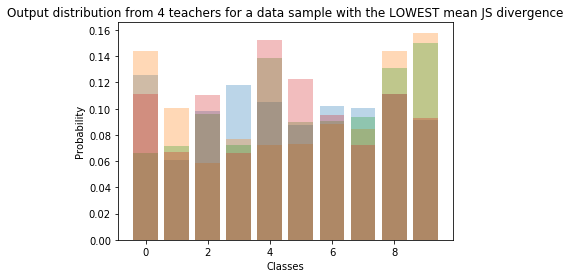

In [33]:
lowest = desc_idxs[-1]
for t_name in teacher_outputs:
    rand_idx = np.random.randint(SAMPLES)
    plt.bar(range(CLASSES), teacher_outputs[t_name][lowest], alpha=0.3)
plt.xlabel("Classes")
plt.ylabel("Probability")
plt.title("Output distribution from 4 teachers for a data sample with the LOWEST mean JS divergence")
plt.show()